In [2]:
import numpy as np
import pandas as pd
from pandas import read_csv
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib
import matplotlib.pyplot as plt
import math

In [3]:
date_parser = lambda d: datetime.strptime(d, '%Y%m')

# Read Dataset from CSV into Pandas Dataframe.
indexed_data_df = read_csv(
    '../../data/data.csv',
    names=['date', 'temperature'],
    dtype={'date': 'str', 'temperature': 'float'},
    parse_dates=['date'],
    date_parser=date_parser,
    index_col='date'
)

data_df = read_csv(
    '../../data/data.csv',
    names=['date', 'temperature'],
    dtype={'date': 'str', 'temperature': 'float'},
    parse_dates=['date'],
    date_parser=date_parser
)
np_data = np.array([[np.datetime64(d), t] for d, t in data_df.to_numpy()])

d:\Documents\GitHub\climate-data-mining\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
d:\Documents\GitHub\climate-data-mining\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
d:\Documents\GitHub\climate-data-mining\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


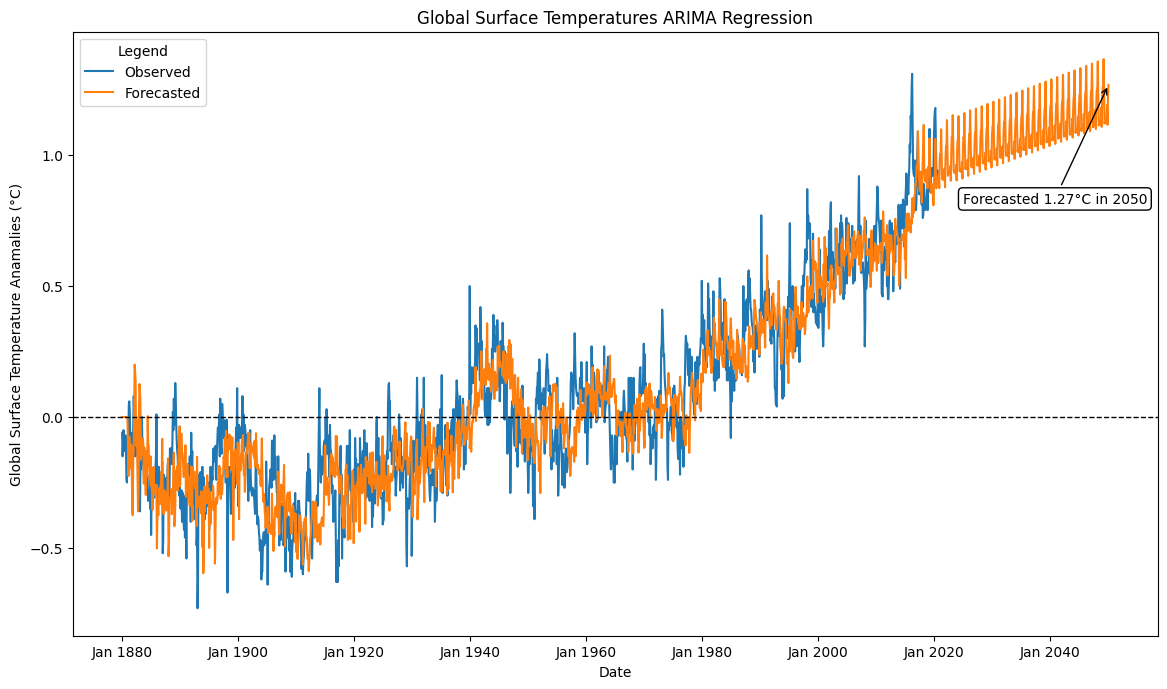

In [19]:
# Fit data to ARIMA model

model = ARIMA(indexed_data_df, seasonal_order=(2, 2, 1, 12))
model_fit = model.fit()

start_date = datetime.strptime('01-1880', '%m-%Y')
end_date = datetime.strptime('01-2050', '%m-%Y')
forecast_data = model_fit.predict(start=start_date, end=end_date)

fig = plt.figure(figsize=(14, 8), dpi=100, facecolor='w', edgecolor='k')
sub_plot = fig.add_subplot(1,1,1)

sub_plot.title.set_text('Global Surface Temperatures ARIMA Regression')
sub_plot.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
sub_plot.set_xlabel('Date')
sub_plot.set_ylabel('Global Surface Temperature Anamalies (°C)')
observed_plot = sub_plot.plot(np_data[:,0], np_data[:,1], label='Observed')
forecasted_plot = sub_plot.plot(forecast_data, label='Forecasted')

sub_plot.axhline(0, color='black', lw=1, linestyle='--')
sub_plot.annotate(f'Forecasted {round(forecast_data[-1],2)}°C in 2050', xy=(end_date, forecast_data[-1]), xytext=(-105,-85), textcoords="offset points", bbox=dict(boxstyle="round", fc="w"), arrowprops=dict(arrowstyle="->"))

plt.legend((observed_plot, forecasted_plot), labels=('Observed', 'Forecasted'), title='Legend', loc='upper left')
plt.show()

d:\Documents\GitHub\climate-data-mining\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
d:\Documents\GitHub\climate-data-mining\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
d:\Documents\GitHub\climate-data-mining\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


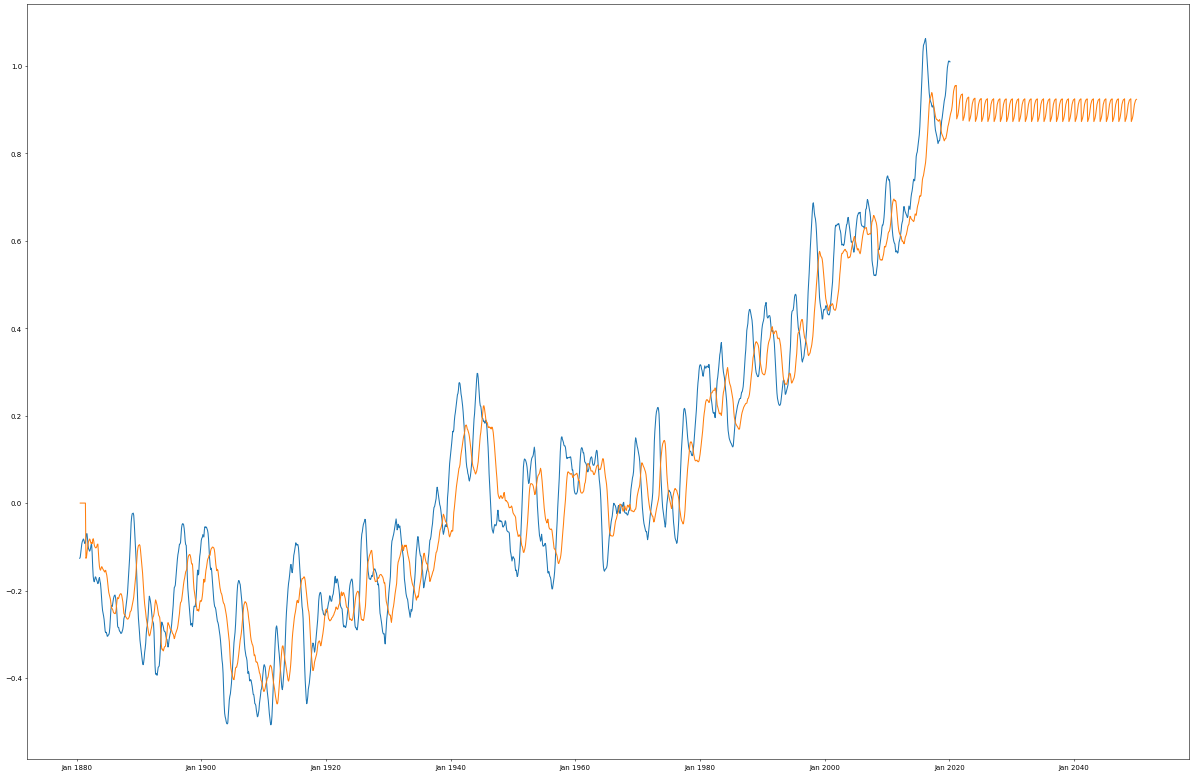

In [5]:
# Run ARIMA model on decomposed data
decompose_res = seasonal_decompose(indexed_data_df, model='additive', freq=12)
trend_data = decompose_res.trend.dropna()

model = ARIMA(trend_data, seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

start_date = datetime.strptime('08-1880', '%m-%Y')
end_date = datetime.strptime('01-2050', '%m-%Y')
tested_data = model_fit.predict(start=start_date, end=end_date)

fig = plt.figure(figsize=(30, 20), dpi=50, facecolor='w', edgecolor='k')
sub_plot = fig.add_subplot(1,1,1)
sub_plot.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
sub_plot.plot(trend_data)
sub_plot.plot(tested_data)
plt.show()